In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

from data_handling.data_loader import load_mavir_data
from trainer_lib import Grid, transformer_grid_search, TrainerOptions, GridSearchOptions
from models import Transformer
import utils

In [2]:
df = load_mavir_data('data/mavir_data/mavir.csv')
df['Power'] = utils.min_max_norm(df['Power'])
sample = utils.sample(df, 5000, start_idx=0)

# imfs, residue = utils.apply_eemd(sample['Power'].to_numpy(), spline_kind='akima')

In [3]:
training_data = np.array(sample['Power'].to_numpy()[...,np.newaxis], dtype=np.float32)
# training_data_decomp = np.array(np.c_[imfs.transpose(), residue[...,np.newaxis]], dtype=np.float32)
# training_data_decomp_rem = np.array(np.c_[imfs[1:].transpose(), residue[...,np.newaxis]], dtype=np.float32)
# training_data_combined = np.array(np.c_[sample['Power'].to_numpy()[...,np.newaxis], imfs.transpose(), residue[...,np.newaxis]], dtype=np.float32)
# training_data_combined_rem = np.array(np.c_[sample['Power'].to_numpy()[...,np.newaxis], imfs[1:].transpose(), residue[...,np.newaxis]], dtype=np.float32)
# print(training_data.shape)
# print(training_data.dtype)
# print(training_data_decomp.shape)
# print(training_data_decomp.dtype)

In [4]:
params = {
    'src_size' : [1],
    'tgt_size' : [1],
    'd_model' : [256], #, 256, 512],
    'num_heads' : [2], # , 4, 8],
    'num_layers' : [2], # , 2, 3],
    'd_ff' : [512, 1024], # , 1024, 2048],
    'src_seq_length' : [24], # , 96],
    'tgt_seq_length' : [1],
    'src_window': [4, 8],
    'tgt_window': [1],
    'dropout' : [0.2], # , 0.1, 0.15, 0.2],
}

grid = Grid(params)
names = utils.generate_name(len(grid), 42)

training_opts = TrainerOptions(
    batch_size=8,
    epochs=30,
    learning_rate=1e-4,
    weight_decay=1e-4,
    warmup_steps=10,
    warmup_start_factor=1e-6,
    gradient_accumulation_steps=8,
    early_stopping_patience=5,
    early_stopping_min_delta=0.01,
    save_every_n_epochs=5,
    save_path=''
)

grid_search_opts = GridSearchOptions(
    root_save_path='./trained/regular/',
    valid_split=0.2,
    window_step_size=4,
    random_seed=42,
    use_start_token=True
)

models = transformer_grid_search(grid, training_data, training_opts, grid_search_opts)

Train size: 981, Validation size: 245
Epoch: 1; Learning rate: [1.0000090000000002e-05]; Train - MSE: 1.1832257686107135; Eval - MSE: 1.0620808966698185, RMSE: 1.0253377130568648, MAE: 0.9948135018348694, MAPE: -0.5809516906738281
Epoch: 2; Learning rate: [2.0000080000000004e-05]; Train - MSE: 0.9145012940090855; Eval - MSE: 0.27364884389023625, RMSE: 0.5131791496856494, MAE: 0.4472818076610565, MAPE: 0.28018784523010254
Epoch: 3; Learning rate: [3.000007000000001e-05]; Train - MSE: 0.414907518834845; Eval - MSE: 0.15731217339634895, RMSE: 0.39108115774544244, MAE: 0.3471563160419464, MAPE: 0.4681875705718994
Epoch: 4; Learning rate: [4.000006000000001e-05]; Train - MSE: 0.35198215252863696; Eval - MSE: 0.22917194496239388, RMSE: 0.4725854756275144, MAE: 0.4273707866668701, MAPE: 0.3438297510147095
Epoch: 5; Learning rate: [5.0000050000000006e-05]; Train - MSE: 0.2945911552060428; Eval - MSE: 0.09869019567005098, RMSE: 0.3101246119228978, MAE: 0.27065515518188477, MAPE: 0.5844373703002

/home/aszfalt/Documents/projects/wp_former/venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 10; Learning rate: [0.0001]; Train - MSE: 0.23322361353330504; Eval - MSE: 0.07072895452860864, RMSE: 0.263273466700606, MAE: 0.2338728904724121, MAPE: 0.642305314540863
Epoch: 11; Learning rate: [9.900000000000001e-05]; Train - MSE: 0.20685033376018203; Eval - MSE: 0.06640888269870512, RMSE: 0.2550543090770056, MAE: 0.2276497334241867, MAPE: 0.6543819904327393
Epoch: 12; Learning rate: [9.801e-05]; Train - MSE: 0.18975313377331915; Eval - MSE: 0.04194423952890981, RMSE: 0.20028080568716988, MAE: 0.16513440012931824, MAPE: 0.7502430081367493
Epoch: 13; Learning rate: [9.70299e-05]; Train - MSE: 0.16982717418331447; Eval - MSE: 0.04742936309306851, RMSE: 0.2107431446197749, MAE: 0.1620623618364334, MAPE: 0.7513155937194824
Epoch: 14; Learning rate: [9.605960100000001e-05]; Train - MSE: 0.1515785469635716; Eval - MSE: 0.052217989408921806, RMSE: 0.2220132959053681, MAE: 0.1816796064376831, MAPE: 0.7121814489364624
Epoch: 15; Learning rate: [9.509900499000001e-05]; Train - MSE: 0.1

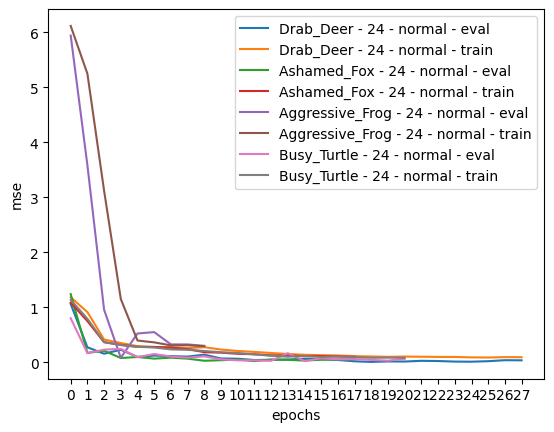

In [5]:

#for model in models_decomp_combined:
#    plt.plot(model['metrics']['eval_loss'], label=f'{model["name"]} - {model["params"]["enc_seq_length"]} - combined')

#for model in models_decomp_combined_rem:
#    plt.plot(model['metrics']['eval_loss'], label=f'{model["name"]} - {model["params"]["enc_seq_length"]} - combined rem')

#for model in models_decomp_rem:
#    plt.plot(model['metrics']['eval_loss'], label=f'{model["name"]} - {model["params"]["enc_seq_length"]} - rem')

#for model in models_decomp:
#    plt.plot(model['metrics']['eval_loss'], label=f'{model["name"]} - {model["params"]["enc_seq_length"]} - decomp')
max_len = 0
for model in models:
    plt.plot(model['metrics']['eval']['MSE'], label=f'{model["name"]} - {model["params"]["src_seq_length"]} - normal - eval')
    plt.plot(np.arange(len(model['metrics']['train']['MSE'])), model['metrics']['train']['MSE'], label=f'{model["name"]} - {model["params"]["src_seq_length"]} - normal - train')
    max_len = max(len(model['metrics']['eval']['MSE']), max_len)
    max_len = max(len(model['metrics']['train']['MSE']), max_len)

plt.xticks(np.arange(max_len))
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

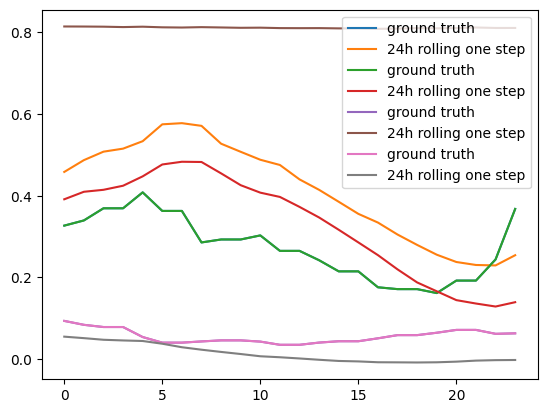

In [7]:
from trainer_lib.datasets import TimeSeriesWindowedTensorDataset, TimeSeriesWindowedDatasetConfig

shift, look_back, pred = 50, 24, 1


for model in models:
    model['model'].eval()
    dataset = TimeSeriesWindowedTensorDataset(training_data, TimeSeriesWindowedDatasetConfig(model['params']['src_window'], 
                                                                                             model['params']['tgt_window'], 
                                                                                             model['params']['src_seq_length'], 
                                                                                             model['params']['tgt_seq_length'], 
                                                                                             1, 
                                                                                             False))
    ones = torch.ones(1, 1, dataset[0][1].shape[-1])
    
    with torch.no_grad():
    
        ground_truth = []
        predicted = []
        for shift_offset in range(shift, shift+24, 1):
            out = ones
            for i in range(pred):
                out = torch.concatenate((ones, model['model'](dataset[shift_offset][0].unsqueeze(0), out)), dim=1)
        
            predicted.append(dataset.get_sequence_from_y_windows(out[:, 1:, :].detach()))
            ground_truth.append(dataset.get_sequence_from_y_windows(dataset[shift_offset][1]))
    
    predicted = np.array(predicted).reshape(24)
    ground_truth = np.array(ground_truth).reshape(24)
    plt.plot(ground_truth, label='ground truth')
    plt.plot(predicted, label='24h rolling one step')
    
    #output = model['model'](
    #    dataset[shift][0].unsqueeze(0),  
    #    torch.concat((ones, dataset[shift][1][:-1, :].unsqueeze(0)), dim=1)
    #)
    #
    #plt.plot(torch.concat(
    #    (dataset.get_sequence_from_x_windows(dataset[shift][0]), 
    #     dataset.get_sequence_from_y_windows(dataset[shift][1])), dim=0), label='original')
    #plt.plot(
    #    torch.concatenate(
    #        (dataset.get_sequence_from_x_windows(dataset[shift][0]),
    #         dataset.get_sequence_from_y_windows(output[:, :, :].detach())), dim=0), 
    #    label='full access - normal'
    #)
    #plt.plot(
    #    torch.concatenate(
    #        (dataset.get_sequence_from_x_windows(dataset[shift][0]), 
    #         dataset.get_sequence_from_y_windows(out[:, 1:, :].detach())), dim=0),
    #    label='predicted - normal'
    #)
    
#for model in models_decomp:
#    out = torch.ones(1,1,11)
#    for _ in range(25):
#        output = model['model'](torch.tensor(training_data_decomp[np.newaxis, 0:72,:]), out)# torch.tensor(training_data[np.newaxis, 73:97,:]))# torch.zeros((1, 24, 1)))
#        out = torch.concatenate((out, output[:,-1,:].unsqueeze(1)), axis=1)
#    plt.plot(out[:, 1:-1, :].detach().reshape((24,11)).sum(-1), label='predicted - decomp')

#for model in models_decomp_rem:
#    out = torch.ones(1,1,10)
#    for _ in range(25):
#        output = model['model'](torch.tensor(training_data_decomp_rem[np.newaxis, 0:72,:]), out)# torch.tensor(training_data[np.newaxis, 73:97,:]))# torch.zeros((1, 24, 1)))
#        out = torch.concatenate((out, output[:,-1,:].unsqueeze(1)), axis=1)
#    plt.plot(out[:, 1:-1, :].detach().reshape((24,10)).sum(-1), label='predicted - rem')

#for model in models_decomp_combined:
#    out = torch.ones(1,1,1)
#    for _ in range(25):
#        output = model['model'](torch.tensor(training_data_combined[np.newaxis, 0:72,:]), out)# torch.tensor(training_data[np.newaxis, 73:97,:]))# torch.zeros((1, 24, 1)))
#        out = torch.concatenate((out, output[:,-1,:].unsqueeze(1)), axis=1)
#    plt.plot(out[:, 1:-1, :].detach().reshape((24,)), label='predicted - combined')

#for model in models_decomp_combined_rem:
#    out = torch.ones(1,1,1)
#    for _ in range(25):
#        output = model['model'](torch.tensor(training_data_combined_rem[np.newaxis, 0:72,:]), out)# torch.tensor(training_data[np.newaxis, 73:97,:]))# torch.zeros((1, 24, 1)))
#        out = torch.concatenate((out, output[:,-1,:].unsqueeze(1)), axis=1)
#    plt.plot(out[:, 1:-1, :].detach().reshape((24,)), label='predicted - combined rem')

plt.legend()
plt.show()